Index(['Job Code', 'Aircraft', 'Transaction Code', 'Malfunction Code',
       'Action Taken Code', 'Description of Problem', 'Correction of Problem',
       'Received Date', 'Completion Date', 'Corrosion', 'Bare Metal',
       'Corrosion Prevention Treatment', 'Routine Maintenance',
       'Unscheduled Maintenance', 'Mission-Related Maintenance', 'Failure'],
      dtype='object')
I'm done
AxesSubplot(0.125,0.125;0.775x0.755)


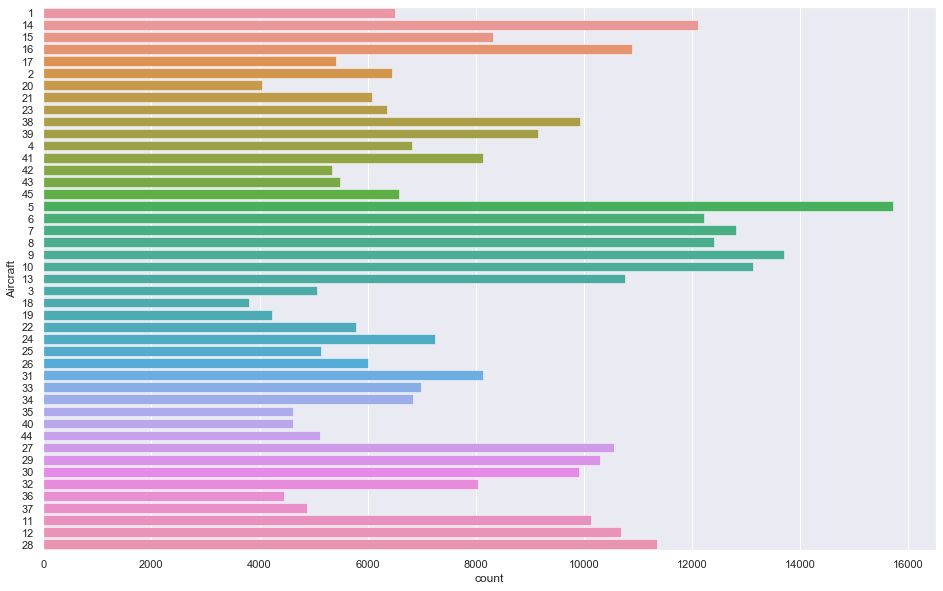

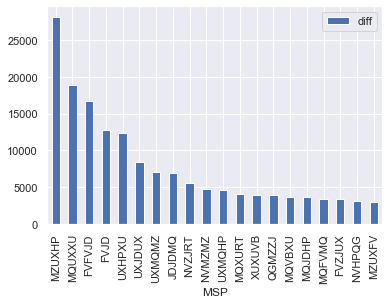

In [1]:
import warnings; warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
import dask.dataframe as dd


maf_data = pd.read_csv("HtM_MAF Data_Final.csv", index_col=None,
                       dtype = {'Transaction Code': str,
                                 'Aircraft': 'category',
                                 'Transaction Code': 'category',
                                 'Malfunction Code': 'category',
                                 'Action Taken Code': 'category',
                                 'Corrosion': 'category'
                                 })

msp_data = pd.read_csv('HTM_MSP_Final.csv',
                     header = 0,
                     names = ['Aircraft', 'Squadron', 'Lot', 'MSP', 'ZULU_Time', 'Flight_Mode'], 
                     dtype = {'Aircraft': 'category',
                             'Squadron': 'category',
                             'Lot': 'category',
                             'MSP': 'category',
                             'Flight_Mode': 'category'})

print(maf_data.columns)


maf_data.dropna(how = 'all', inplace=True)

maf_data['Corrosion'] = maf_data['Corrosion'] == 'Yes'

maf_data['Bare Metal'] = maf_data['Bare Metal'] == 'Yes'

maf_data['Corrosion Prevention Treatment'] = maf_data['Corrosion Prevention Treatment'] == 'Yes'

maf_data['Routine Maintenance'] = maf_data['Routine Maintenance'] == 'Yes'

maf_data['Unscheduled Maintenance'] = maf_data['Unscheduled Maintenance'] == 'Yes'

maf_data['Mission-Related Maintenance'] = maf_data['Mission-Related Maintenance'] == 'Yes'

maf_data['Failure'] = maf_data['Failure'] == 'Yes'

maf_data['Received Date'] = pd.to_datetime(maf_data['Received Date'])
maf_data['Completion Date'] = pd.to_datetime(maf_data['Completion Date'])


msp_data['Fault Date'] = pd.to_datetime(msp_data['ZULU_Time'].str.split(" ", n = 2, expand = True)[1])    

msp_data['Fault Time'] = pd.to_datetime(msp_data['ZULU_Time'].str.split(" "
    , n = 2, expand = True)[2], format = '%H:%M:%S:%f', errors='ignore')

msp_data['Fault Time'] = pd.to_datetime(msp_data['ZULU_Time'].str.split(" "
    , n = 2, expand = True)[2], format = '%H:%M:%S', errors='ignore')


# ------------------------------------------

#print(maf_data.count())
#input("Enter to continue.")

#print(msp_data.count())
#input("Enter to continue.")

# maf_data['Aircraft'].count()
#print(maf_data.Aircraft.count())
#input("Enter to continue.")

#print((maf_data.Aircraft == 1).sum())
#input("Enter to continue.")

#print(maf_data.Aircraft.value_counts)
#input("Enter to continue.")
#print(maf_data['Aircraft'].value_counts)
#input("Enter to continue.")

sns.set(style="darkgrid")
plt.figure(figsize=(16, 10))
ax = sns.countplot(y="Aircraft",linewidth = 0.5 , data = maf_data)

#-----------------------------------------------------------------------------
# Corrosion Begins

corrosion_actions = maf_data[maf_data['Corrosion'] | maf_data['Bare Metal'] | maf_data['Corrosion Prevention Treatment']]

corrosion_actions["action_month"] = pd.DatetimeIndex(corrosion_actions['Completion Date']).month

corrosion_actions["action_year"] = pd.DatetimeIndex(corrosion_actions['Completion Date']).year

msp_data['action_year'] = pd.DatetimeIndex(msp_data['Fault Date']).year

#print(msp_data.head())
#input("Enter to continue.")

#print(msp_data.head())
#input("Enter to continue.")

#print(corrosion_actions.head())
#input("Enter to continue.")

#newb_data = pd.DataFrame(columns=['Aircraft', 'action_year', 'Fault Date'])

cut_corr = np.array_split(corrosion_actions , 3)
cut_msp = np.array_split(msp_data ,3)
cut_maf = np.array_split(maf_data , 20)

# for i in range(0,3):
#     combined_data = pd.merge(cut_corr[i], cut_msp[i])

combined_data = pd.merge(cut_corr[0], cut_msp[0])
combined_data = pd.merge(cut_corr[1], cut_msp[1])
combined_data = pd.merge(cut_corr[2], cut_msp[2])



# for p in range(0,20):
#     combined_data = pd.merge(combined_data ,cut_maf[i].filter(['Job Code']), how='left', on = ['Aircraft'])

#combined_data = pd.merge(combined_data, maf_data.filter(['Job Code']), how='left' , on = ['Corrosion'])


# combined_data = pd.merge(cut_corr[0], cut_msp[0])#.filter(['Aircraft', 'action_year']), how='left', on = ['Aircraft', 'action_year'])
# combined_data = pd.merge(cut_corr[1], cut_msp[1]) #.filter(['Aircraft', 'action_year']), how='left', on = ['Aircraft', 'action_year'])
# combined_data = pd.merge(cut_corr[2], cut_msp[2]) #.filter(['Aircraft', 'action_year']), how='left', on = ['Aircraft', 'action_year'])
# combined_data = pd.merge(cut_corr[3], cut_msp[3])#.filter(['Aircraft', 'action_year']), how='left', on = ['Aircraft', 'action_year'])
# combined_data = pd.merge(cut_corr[4], cut_msp[4]) #.filter(['Aircraft', 'action_year']), how='left', on = ['Aircraft', 'action_year'])
# combined_data = pd.merge(cut_corr[5], cut_msp[5])
# combined_data = pd.merge(cut_corr[6], cut_msp[6])
# combined_data = pd.merge(cut_corr[7], cut_msp[7])
# combined_data = pd.merge(cut_corr[8], cut_msp[8])
# combined_data = pd.merge(cut_corr[9], cut_msp[9])


#combined_data = pd.merge(cut_corr[0], cut_msp[0].filter(['MSP']), how='left', on = ['Aircraft', 'action_year'])



# combined_data.drop_duplicates(keep= False , inplace = True)
# combined_data.sort_values('Aircraft', ascending=True)

# combined_cut = np.array_split(combined_data , 20)

# for p in range(0,20):
#     new_combined = pd.merge(cut_maf[p], combined_cut[p])


# print(new_combined.head())
# print(new_combined.count())



#newb_data.loc['Fault Date'] = msp_data.loc['Fault Date']

#combined_data = np.array_split(pd.merge(corrosion_actions, msp_data.filter(['Aircraft', 'action_year']), how='left', on = ['Aircraft', 'action_year']), 4)

combined_data['before_window'] = combined_data['Completion Date'] - pd.DateOffset(months = 1)

combined_data['after_window'] = combined_data['Completion Date'] + pd.DateOffset(months = 1)

combined_data = combined_data[(combined_data['Fault Date'] > combined_data['before_window']) & (combined_data['Fault Date'] < combined_data['after_window'])]

combined_data['Pre'] = combined_data['Fault Date'] < combined_data['Completion Date']

combined_data = combined_data[(combined_data['Fault Date'] > combined_data['Completion Date']) | (combined_data['Fault Date'] < combined_data['Received Date'])]



print("I'm done")
combined_data['row'] = True


msp_counts = combined_data[['Job Code', 'MSP', 'Pre', 'row']].groupby(['Job Code', 'MSP', 'Pre']).count().reset_index()

msp_pre = combined_data.query('Pre == True').groupby('MSP')[['row']].count().reset_index().rename(columns = {'row': 'pre'})

msp_post = combined_data.query('Pre == False').groupby('MSP')[['row']].count().reset_index().rename(columns = {'row': 'post'})

msp_diff = msp_post.merge(msp_pre, how = 'left', on = 'MSP')


msp_diff['diff'] = msp_diff['pre'] - msp_diff['post']

msp_diff.head()

print(msp_diff.sort_values('diff', ascending=False).reset_index().head(20).plot.bar(x = 'MSP', y = 'diff'))




In [5]:
###############################################################
#NEW


msp_interest = msp_diff.sort_values('diff', ascending=False).reset_index().head(20)['MSP']

msp_interest

msp_counts[msp_counts['MSP'].isin(msp_interest)].to_csv('MSP_freq.csv', index = False)

msp_counts['row'] = msp_counts['row'].astype('category')



corrosion = msp_counts[msp_counts['MSP'].isin(msp_interest)].query('Pre').drop('Pre', axis = 1).pivot(index = 'Job Code', columns = 'MSP', values = 'row').reset_index()

corrosion['corrosion'] = True

corrosion.drop('Job Code', axis = 1, inplace = True)

corrosion.head()

non_corrosion_actions = maf_data[~(maf_data['Corrosion'] | maf_data['Bare Metal'] | maf_data['Corrosion Prevention Treatment'])].sample(60000, axis = 0, random_state = 35)

non_corrosion_actions["action_month"] = pd.DatetimeIndex(non_corrosion_actions['Completion Date']).month

non_corrosion_actions["action_year"] = pd.DatetimeIndex(non_corrosion_actions['Completion Date']).year

combined_data_non = non_corrosion_actions.merge(msp_data[['Aircraft', 'action_year', 'MSP', 'Flight_Mode', 'Fault Date']], how = 'left', on = ['Aircraft', 'action_year'])

combined_data_non['before_window'] = combined_data_non['Completion Date'] - pd.DateOffset(months = 1)

combined_data_non['after_window'] = combined_data_non['Completion Date'] + pd.DateOffset(months = 1)

combined_data_non = combined_data_non[(combined_data_non['Fault Date'] > combined_data_non['before_window']) & (combined_data_non['Fault Date'] < combined_data_non['after_window'])]

combined_data_non['Pre'] = combined_data_non['Fault Date'] < combined_data_non['Completion Date']

combined_data_non = combined_data_non[(combined_data_non['Fault Date'] > combined_data_non['Completion Date']) | (combined_data_non['Fault Date'] < combined_data_non['Received Date'])]

combined_data_non['row'] = True

non_msp_counts = combined_data_non[['Job Code', 'MSP', 'Pre', 'row']].groupby(['Job Code', 'MSP', 'Pre']).count().reset_index()

non_corrosion = non_msp_counts[non_msp_counts['MSP'].isin(msp_interest)].query('Pre').drop('Pre', axis = 1).pivot(index = 'Job Code', columns = 'MSP', values = 'row').fillna(0.0).reset_index()

non_corrosion['corrosion'] = False

non_corrosion.drop('Job Code', axis = 1, inplace = True)

non_corrosion.shape

corrosion.shape


ValueError: fill value must be in categories